# News Mood - Sentiment Analyzer
Produced by Verna Orsatti July 1,2018 Final Version

# Analysis

For this analysis, a snapshot in time was taken for the last 100 tweets for each of 5 different major news agencies.  In Figure 1, "Sentiment Analysis of Media Tweets," each point represents the overall sentiment caluclated on the tweet.  For tweets scoring neutral, they will fall on line zero. All other tweets will fall either in the positive or negative range.  

From this plot, we do see that there is a heavier proportion of the positive tweets overall for combined agencies than to the negative, however it is not observable to see the proportion of the neutral tweets as they are accumulated heavily on line 0.

Figure 2,  represents the same tweet data in a way that is much more understandable with aggregated columns of the averaged sentiment score per news agency.  It is clear that CBS in this snapshot in time, scores highest for positive sentiments significantly more that the other agencies.  

Without knowing what is in the news that may affect the tweet content, it is difficult to say why the difference in bar values are so varied.  However one might safely conclude that CBS's tweets generally lack the negative opinions more than the others have, with BBC coming in second.

CNN, New York Times, and Fox News appear to be fairly controversial news agencies with their aggregated scores laying close to neutral.  We know that from Figure 1, that the scatter of points on the graph show a wide range of sentiments, so that although the aggregated scores of these agencies are close to the neutral score of zero, their makeup is much different.  

The two figures together are necessary to achieve this understanding: 
    Figure 1 reveals the context that figure 2's values reveal.

Taking periodic snapshots through different times of the day and over a longer period of time would reveal if these sentiments were somewhat consitant, or are changeable to a degree based on time of day, day of the week, and for the week.  

Linking and tracking content of current events would further give indication of why the tweets have their sentiment ranking. 

In [1]:
#Setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import tweepy
import seaborn as sns
sns.set()

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Hard code keys
consumer_key = "e2BnfEpvduOQB3L7ucTPFzIk4"
consumer_secret = "cHXQ3mMo9BRoTJuhsru8VfLSY5lzYd3cmVHQno22V2TIOYCLhX"
app_key = "853742326568677376-GtQ3RoG8iIxidIalAVK9n9h4XxoZizP"
app_secret = "KdSFuPtjjyTZynl4aZbdoapSr3zxXC69QSWd6J7SfJSPe"

In [2]:
# Authentication
def authenticate():
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(app_key, app_secret)
    api = tweepy.API(auth)
    return api
api = authenticate()

In [3]:
#Report Date
now = datetime.datetime.now()
today = now.strftime("%m/%d/%Y")

In [4]:
# Create DataFrame for sentiment value, sort by time 100 tweets for each of 6 news outlets

In [5]:
# Collect data into dataframe routine
media_sources = ['@BBC', '@CBS','@CNN','@FoxNews','@nytimes']

def get_tweets_by_handle(twitter_handle, num_items):
    temp_tweet_list = []
    # The default sort should be from most recent to oldest
    # we'll use enumerate to track an index in our loop for 'tweets ago'
    for idx, tweet in enumerate(tweepy.Cursor(api.user_timeline, id=twitter_handle ).items(num_items)):
        # convert the Status class object to a dict
        _tweet = tweet._json
        # create a new key on the dict called tweets ago, using the index that enumerate throws off
        _tweet['Sequence'] = idx + 1
        # get sentiment
        results = analyzer.polarity_scores(_tweet["text"])
        # add sentiment results
        _tweet['polarity_data'] = results
        temp_tweet_list.append(_tweet)
    
    temp_df = pd.DataFrame([x for x in temp_tweet_list])
    # Pull out all the proper sentiment columns
    temp_df['Positive'] = temp_df.polarity_data.map(lambda x: x.get('pos'))
    temp_df['Negative'] = temp_df.polarity_data.map(lambda x: x.get('neg'))
    temp_df['Neutral'] = temp_df.polarity_data.map(lambda x: x.get('neu'))
    temp_df['Compound'] = temp_df.polarity_data.map(lambda x: x.get('compound'))
    temp_df['Source'] = temp_df['user'].map(lambda x: x.get('screen_name'))
    return temp_df

combined_df = pd.concat([get_tweets_by_handle(x[1:], 100) for x in media_sources], axis=0)
#combined_df.head()

In [6]:
# Create desired dataframe
final_df = combined_df[['Source','Sequence','text','created_at','Compound','Positive','Neutral','Negative']]
#final_df.head(500)

In [7]:
# Rename columns
final_df = final_df.rename(columns={'text':'Tweet','created_at':'Date'})

In [8]:
# Desired dataframe to csv file
output_data_file = "news_mood_data.csv"
final_df.to_csv(output_data_file) 

In [9]:
bbc_df = final_df.query('Source == "BBC"')
#bbc_df

In [10]:
cbs_df = final_df.query('Source == "CBS"')
#cbs_df

In [11]:
cnn_df = final_df.query('Source == "CNN"')
#cnn_df

In [12]:
fox_df = final_df.query('Source == "FoxNews"')
#fox_df

In [13]:
nyt_df = final_df.query('Source == "nytimes"')
#nyt_df

# Sentiment Analysis of Media Tweets

In [14]:
# Define values for figure 1
# Tweet Compond sentiment
bbc_comp = bbc_df.Compound.tolist()
cbs_comp = cbs_df.Compound.tolist()
cnn_comp = cnn_df.Compound.tolist()
fox_comp = fox_df.Compound.tolist()
nyt_comp = nyt_df.Compound.tolist()

# Tweet Sequence 
bbc_seq = bbc_df.Sequence.tolist()
cbs_seq = cbs_df.Sequence.tolist()
cnn_seq = cnn_df.Sequence.tolist()
fox_seq = fox_df.Sequence.tolist()
nyt_seq = nyt_df.Sequence.tolist()

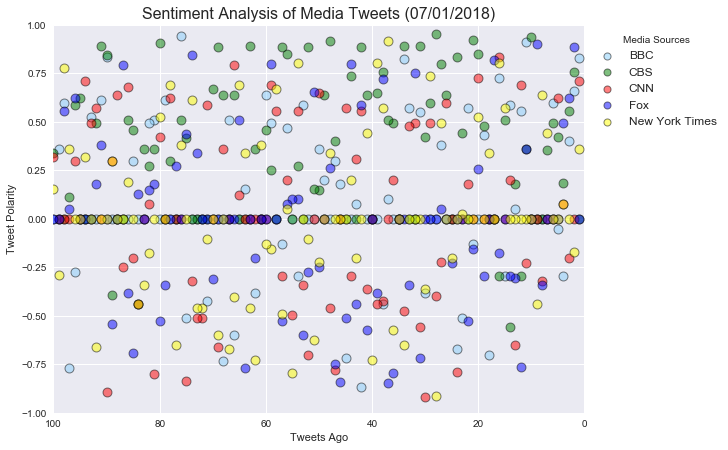

In [15]:
# Figure 1 setup
source = ['BBC','CBS','CNN','Fox','New York Times']
colors = ['lightskyblue','green','red','blue','yellow']

plt.figure(figsize=(10,8))
plt.xlim(100,0)
plt.ylim(-1,1)
# plot BBC
plt.scatter(bbc_seq, bbc_comp, s=80, c="lightskyblue", edgecolors="black", alpha=.5, linewidth=1, label="BBC")
# plot CBS
plt.scatter(cbs_seq, cbs_comp, s=80, c="green", edgecolors="black",alpha=.5, linewidth=1, label="CBS")
# plot CNN
plt.scatter(cnn_seq, cnn_comp, s=80, c="red", edgecolors="black",alpha=.5, linewidth=1, label="CNN")
# plot Fox
plt.scatter(fox_seq, fox_comp, s=80, c="blue", edgecolors="black",alpha=.5, linewidth=1, label="Fox")
# plot New York Times
plt.scatter(nyt_seq, nyt_comp, s=80, c="yellow", edgecolors="black",alpha=.5, linewidth=1, label="New York Times")

title = "Sentiment Analysis of Media Tweets ({})".format(today)
plt.title(title, fontsize=16)
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')

legen = plt.legend(title="Media Sources", loc='upper left', prop={'size':12}, bbox_to_anchor=(1,1))
plt.tight_layout(pad=7)
legen.legendHandles[0]._sizes = [50]
legen.legendHandles[1]._sizes = [50] 
legen.legendHandles[2]._sizes = [50]
legen.legendHandles[3]._sizes = [50]
legen.legendHandles[4]._sizes = [50]
# Create figure png file for Sentiment Analysis of Media Tweets
plt.savefig("Sentiment_Analysis.png")

plt.show()

# Overall Media Sentiment Based on Twitter

In [16]:
# Define values for figure 2
bbc_comp = round((bbc_df["Compound"].mean()),2)
cbs_comp = round((cbs_df["Compound"].mean()),2)
cnn_comp = round((cnn_df["Compound"].mean()),2)
fox_comp = round((fox_df["Compound"].mean()),2)
nyt_comp = round((nyt_df["Compound"].mean()),2)
polarity = [bbc_comp,cbs_comp,cnn_comp,fox_comp,nyt_comp]

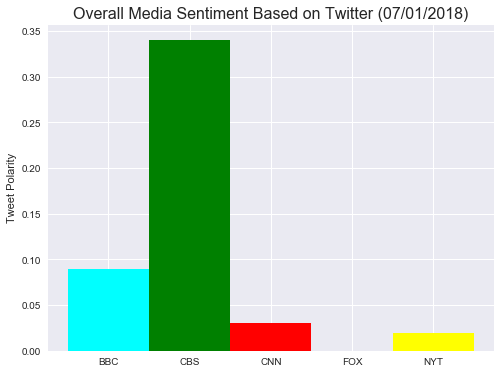

In [17]:
# Construct figure
bars = ('BBC', 'CBS', 'CNN', 'FOX', 'NYT')

plt.figure(figsize=(8,6))
y_pos = [0, .8, 1.6, 2.4, 3.2] 
plt.ylabel('Tweet Polarity')
title = "Overall Media Sentiment Based on Twitter ({})".format(today)
plt.title(title, fontsize=16)
plt.bar(y_pos, polarity, color=['cyan', 'green', 'red', 'blue', 'yellow'])
plt.xticks(y_pos, bars)

# Create figure png file
plt.savefig("Overall_Sentiment.png")

plt.show()

In [18]:
# "Peoples minds are changed through observation and not through argument"
#     ~ Will Rogers